# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 2. Importing Data

In [2]:
r_data = pd.read_csv('/kaggle/input/riyadh-weather/Riyadh_weather.csv')

In [3]:
r_data.head()

,date,Temperature_Max,Temperature_Avg,Temperature_Min,Dew_Point_Max,Dew_Point_Avg,Dew_Point_Min,Humidity_Max,Humidity_Min,Wind_speed_Max,Wind_speed_Min,Pressure_Max,Pressure_Min
0,2008-1-1,78,62,46,36,30,27,53,17,8,0,30.15,30.01
1,2008-1-2,80,68,55,39,33,30,41,20,14,4,30.06,29.95
2,2008-1-3,80,66,51,43,37,30,58,18,9,0,30.09,29.98
3,2008-1-4,71,65,59,57,45,36,82,37,13,0,30.09,29.98
4,2008-1-5,66,60,51,57,51,46,94,55,14,0,30.18,30.06


# 3. Feature Selection

In [4]:
r_data.drop('date',axis = 1, inplace=True)

In [5]:
r_data.columns

Index(['Temperature_Max', 'Temperature_Avg', 'Temperature_Min',
       'Dew_Point_Max', 'Dew_Point_Avg', 'Dew_Point_Min', 'Humidity_Max',
       'Humidity_Min', 'Wind_speed_Max', 'Wind_speed_Min', 'Pressure_Max',
       'Pressure_Min'],
      dtype='object')

<AxesSubplot:>

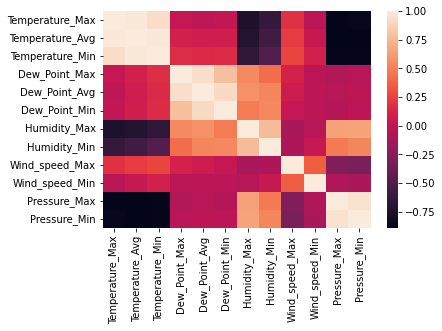

In [6]:
sns.heatmap(r_data.corr())

In [7]:
data = r_data[['Temperature_Avg', 'Dew_Point_Avg', 'Humidity_Max',
       'Wind_speed_Max', 'Pressure_Max']]

<AxesSubplot:>

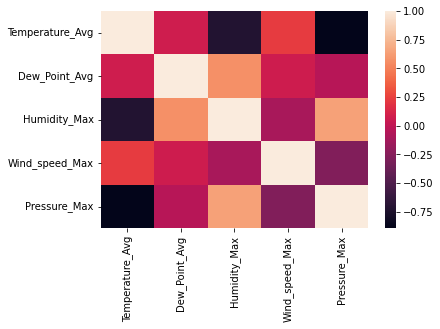

In [8]:
sns.heatmap(data.corr())

In [9]:
y = np.array(data['Temperature_Avg'])
x = np.array(data.drop('Temperature_Avg', axis = 1))

# 4. Test Train Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state = 32)

# 5. Modeling

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# 6. Evaluation Metrics

In [12]:
print(f'R_squared: {round(lr.score(X_test, y_test),2)}')

R_squared: 0.91


In [13]:
print(f'Root Mean Squared Error: {sqrt(mean_squared_error(y_test, lr.predict(X_test)))}')
print(f'Absolute Mean Error: {mean_absolute_error(y_test, lr.predict(X_test))}')

Root Mean Squared Error: 4.260657493536112
Absolute Mean Error: 3.3221918522968723


# 7. Test using test samples

In [14]:
X_test[5:15]

array([[60.  , 88.  , 13.  , 30.06],
       [30.  , 18.  , 14.  , 29.95],
       [37.  , 36.  , 12.  , 29.92],
       [28.  , 23.  , 16.  , 29.98],
       [48.  , 65.  , 20.  , 30.01],
       [ 4.  , 30.  , 15.  , 30.49],
       [36.  , 43.  ,  9.  , 30.04],
       [32.  , 31.  , 23.  , 29.98],
       [33.  , 19.  , 14.  , 29.71],
       [37.  , 59.  , 10.  , 30.12]])

In [15]:
lr.predict(X_test[5:15])

array([73.33495929, 87.037945  , 84.96066154, 82.43028612, 76.97121541,
       44.89563174, 76.96059429, 81.88132714, 96.92787121, 67.84788543])

In [16]:
np.array(y_test[5:15])

array([72, 90, 84, 86, 84, 44, 81, 69, 92, 68])

# 8. Visualization of Test Data

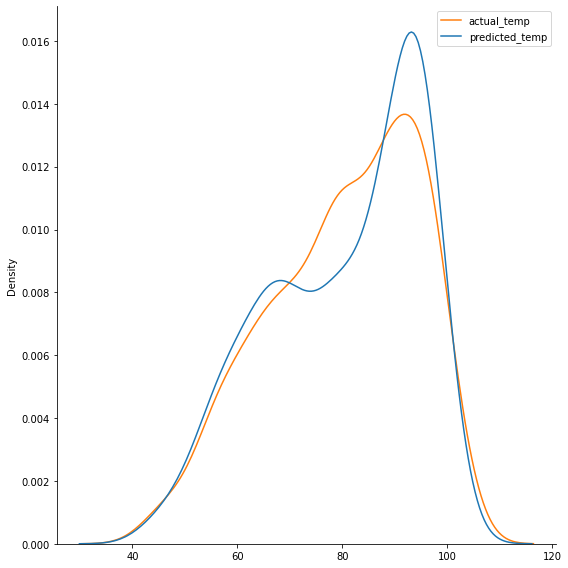

In [17]:
sns.displot([y_test, lr.predict(X_test)], kind = 'kde', legend = False, height = 8)
plt.legend(['actual_temp','predicted_temp'])
plt.show()

### We can see that we have slightly more values for temperature at the range of 90 - 95 degree. However, almost at every other range of temperature, we have a very good estimation of the average temperature.

# 9. Saving the model

In [18]:
import pickle

In [19]:
pickle.dump(lr, open('LinerRegression_model.sav', 'wb'))

# 10. Final function for deployent

In [20]:
def final_function(single_data):
    
    if len(single_data.shape)==1:
        single_data = single_data.reshape(1,-1)
        
    model = pickle.load(open('/kaggle/working/LinerRegression_model.sav', 'rb'))
    pred_avg_temp = model.predict(single_data)
    print(f'Avg Dew Point: {single_data[0][0]}')
    print(f'Max Humidity: {single_data[0][1]}')
    print(f'Max Wind Speed: {single_data[0][2]}')
    print(f'Max Pressure: {single_data[0][3]}')
    return int(pred_avg_temp[0])

In [21]:
single_test = np.array([4,30,15,30.49])

In [22]:
final_function(single_test)

Avg Dew Point: 4.0
Max Humidity: 30.0
Max Wind Speed: 15.0
Max Pressure: 30.49


44